In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn

In [47]:
import tensorflow as tf
from tensorflow.keras import layers

In [48]:
import yfinance as yf

In [49]:
btc_data  = yf.download('BTC-USD' , period='3600d')
df = btc_data[['Open', 'High', 'Low', 'Close' , 'Adj Close', 'Volume']]  # İlgili sütunların seçilmesi

df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [50]:
df.info()  # Veri setinin bilgileri

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3425 entries, 2014-09-17 to 2024-02-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3425 non-null   float64
 1   High       3425 non-null   float64
 2   Low        3425 non-null   float64
 3   Close      3425 non-null   float64
 4   Adj Close  3425 non-null   float64
 5   Volume     3425 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 187.3 KB


In [51]:
len(df)  # Veri setinin uzunluğu

3425

In [52]:
#candelstick grafiği çizdirme
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=1)

fig.add_trace(go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close']),row=1, col=1)

fig.add_trace(go.Scatter(x=df.index, y=df['Volume']),row=2, col=1)

fig.update_layout(height=600, width=1400, title_text="Bitcoin")
fig.show()


/Users/mustafakapici/anaconda3/envs/all/lib/python3.11/site-packages/mplfinance/_arg_validators.py:84: UserWarning:




            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.




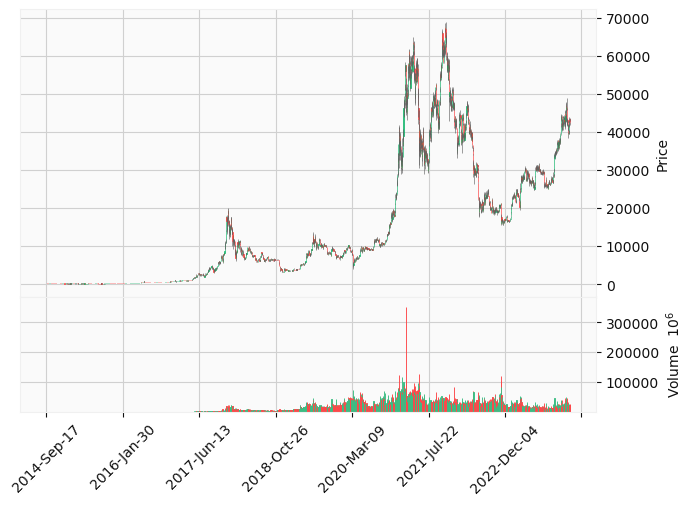

In [53]:
# mpl finance ile candelstick grafiği çizdirme
import mplfinance as mpf

mpf.plot(df, type='candle', volume=True, style='yahoo')




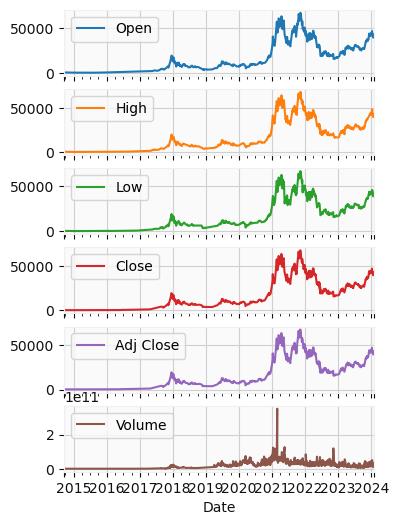

In [54]:
# Veri setinin özelliklerinin çizdirilmesi
df.plot(subplots=True, figsize=(4,6))
plt.show()


In [55]:
# Formatting historical Bitcoin data with Python

from datetime import datetime

timesteps = []
open = []
high = []
low = []
close = []
volume = []
adj_close = []


In [56]:
# İLK 10 SATIRIN GÖSTERİLMESİ    

for row in df.itertuples():
    timesteps.append(row.Index)
    open.append(row.Open)
    high.append(row.High)
    low.append(row.Low)
    close.append(row.Close)
    volume.append(row.Volume)


timesteps[:10] , open[:10] , high[:10] , low[:10] , close[:10] , volume[:10] 

([Timestamp('2014-09-17 00:00:00'),
  Timestamp('2014-09-18 00:00:00'),
  Timestamp('2014-09-19 00:00:00'),
  Timestamp('2014-09-20 00:00:00'),
  Timestamp('2014-09-21 00:00:00'),
  Timestamp('2014-09-22 00:00:00'),
  Timestamp('2014-09-23 00:00:00'),
  Timestamp('2014-09-24 00:00:00'),
  Timestamp('2014-09-25 00:00:00'),
  Timestamp('2014-09-26 00:00:00')],
 [465.864013671875,
  456.8599853515625,
  424.1029968261719,
  394.6730041503906,
  408.0849914550781,
  399.1000061035156,
  402.0920104980469,
  435.7510070800781,
  423.156005859375,
  411.4289855957031],
 [468.17401123046875,
  456.8599853515625,
  427.8349914550781,
  423.2959899902344,
  412.4259948730469,
  406.9159851074219,
  441.5570068359375,
  436.11199951171875,
  423.5199890136719,
  414.93798828125],
 [452.4219970703125,
  413.10400390625,
  384.5320129394531,
  389.88299560546875,
  393.1809997558594,
  397.1300048828125,
  396.1969909667969,
  421.1319885253906,
  409.4679870605469,
  400.0090026855469],
 [457.334

Text(0, 0.5, 'price')

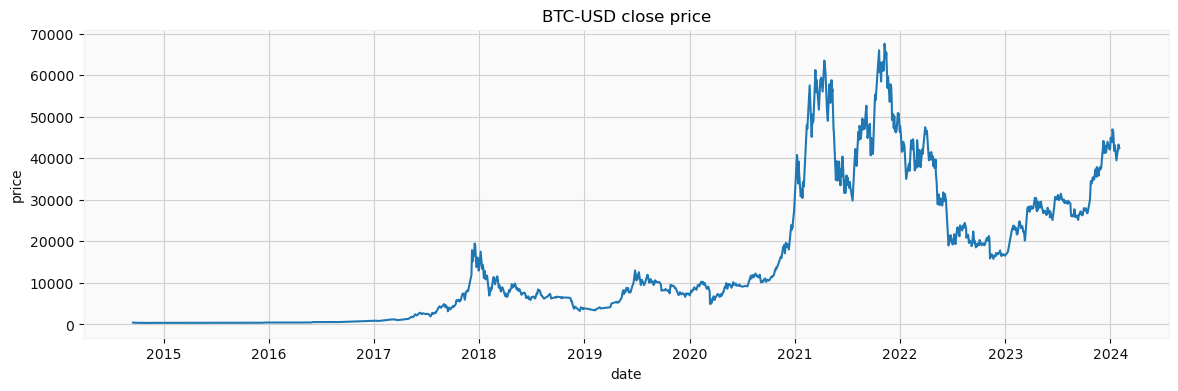

In [57]:
plt.figure(figsize=(14, 4))
plt.plot(timesteps,close)
plt.title('BTC-USD close price')
plt.xlabel('date')
plt.ylabel('price')


In [58]:
timesteps = df.index.to_numpy()
opens = df['Open'].to_numpy()
closes = df['Close'].to_numpy()
highs = df['High'].to_numpy()
lows = df['Low'].to_numpy()
volumes = df['Volume'].to_numpy()

timesteps[:10] , opens[:10] , highs[:10] , lows[:10] , closes[:10] , volumes[:10] 

(array(['2014-09-17T00:00:00.000000000', '2014-09-18T00:00:00.000000000',
        '2014-09-19T00:00:00.000000000', '2014-09-20T00:00:00.000000000',
        '2014-09-21T00:00:00.000000000', '2014-09-22T00:00:00.000000000',
        '2014-09-23T00:00:00.000000000', '2014-09-24T00:00:00.000000000',
        '2014-09-25T00:00:00.000000000', '2014-09-26T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([465.86401367, 456.85998535, 424.10299683, 394.67300415,
        408.08499146, 399.1000061 , 402.0920105 , 435.75100708,
        423.15600586, 411.4289856 ]),
 array([468.17401123, 456.85998535, 427.83499146, 423.29598999,
        412.42599487, 406.91598511, 441.55700684, 436.11199951,
        423.51998901, 414.93798828]),
 array([452.42199707, 413.10400391, 384.53201294, 389.88299561,
        393.18099976, 397.13000488, 396.19699097, 421.13198853,
        409.46798706, 400.00900269]),
 array([457.33401489, 424.44000244, 394.79598999, 408.9039917 ,
        398.8210144 , 402.15200806,

In [ ]:
#create multivariate time series data bu veri verisetinin bütün kolonlarını içerir:

def create_timeseries():